## `lab9`—Modeling Fluid Behavior

❖ Objectives

-   Use $n$-dimensional arrays to manage state data.
-   Plot data.
-   Create a model of scientific data.

In today's lab, you will implement various three fluid modeling laws.  You will then use these data to compare their results with real data and assess the relative accuracy of the various models.

##  Ideal Gas Law

In the physical description of liquids and gases, it often becomes necessary to use a relationship between the pressure on a volume of fluid and its temperature.  The simplest of these relationships is the *ideal gas law*,

$$PV = RT$$

(for a specified number of molecules of the gas).

The ideal gas law describes gases very well near atmospheric conditions and at lower pressures, but deviates from the true behavior of gases under other circumstances.  Since accurate descriptions of fluid flow, chemical reactivity, and oil field dynamics (among other things) depend on describing the state of a liquid, corrections are required.

1.  Write the ideal gas law as a function `pig` which accepts parameters `V` in cubic meters and `T` in degrees Kelvin (absolute temperature) and returns the corresponding `P`ressure in pascals.  $R = 8.314 \,\textrm{joule}\cdot\textrm{K}$, a proportionality constant.

In [2]:
# define your function here
def pig(V, T):
    """
    Return the ideal-gas pressure for a specified volume and temperature.
    
    Keyword arguments:
    V -- volume, in cubic meters
    T -- temperature, in Kelvin
    """
    
    R = 8.314  #joule.K
    ## YOU WRITE THIS BLOCK
    P = R*T/V
    # Finally, return the ideal-gas pressure.
    return P

You may test your function against the following values:
    
| $P$/Pa | $V$/m$^3$ | $T$/K |
|--------|-----------|-------|
| 83140  | 0.01      | 100   |
| 166280 | 0.01      | 200   |

In [3]:
# test your code here
pig(0.01, 273)

226972.2

In [4]:
# it should pass this test---do NOT edit this cell
from numpy import isclose
assert isclose(pig(0.01, 100), 83140)
print('Success!')

Success!


In [5]:
# it should pass this test---do NOT edit this cell
from numpy import isclose
assert isclose(pig(0.01, 200), 166280)
print('Success!')

Success!


##  Cubic Equations of State

The true behavior of gases is extremely complex, but several equations have been introduced to model the gas characteristics approximately.  Among these so-called *equations of state* are the van der Waals equation of state<sup>[[Wikipedia](https://en.wikipedia.org/wiki/Equation_of_state#Van_der_Waals_equation_of_state)]</sup>,

$$
\begin{align*}
P_{\text{vdW}} & = \frac{RT}{V-b} - \frac{a}{V^2} \\
\end{align*}
$$

and the Redlich–Kwong equation of state<sup>[[PhysicsWiki](http://physwiki.ucdavis.edu/Condensed_Matter/Equations_of_state/Redlich-Kwong_equation_of_state)]</sup>,

$$
\begin{align*}
P_{\text{RK}} & = \frac{RT}{V-b} - \frac{a}{\sqrt{T}V(V+b)} \text{.} \\
\end{align*}
$$

(Constants $a$ and $b$ are specific to the gas being modeled:  that is, argon has a certain $a_\text{Ar}$, $b_\text{Ar}$; oxygen has a certain $a_{\text{O}_2}$, $b_{\text{O}_2}$, and so forth.  These typically use constants from the specific fluid known as the *critical temperature* $T_c$, *critical pressure* $P_c$, and *critical volume* $V_c$.

1.  Write the van der Waals equation of state as a function `pvdw` which accepts parameters `V`, `T`, `Tc`, and `Pc`, and returns the corresponding `P`ressure.
    
$$
P_{\text{vdW}} = \frac{RT}{V-b} - \frac{a}{V^2}
\hspace{2cm}
a = \frac{27}{64} \frac{\left(R T_c \right)^{2}}{P_c}
\hspace{2cm}
b = \frac{R T_c}{8 P_c}
\text{.}
$$

In [6]:
# define your function here
def pvdw(V,T,Tc,Pc):
    """
    Return the van der Waals pressure for a specified volume and temperature.
    
    Keyword arguments:
    V -- volume, in cubic meters
    T -- temperature, in Kelvin
    Tc -- critical temperature, in Kelvin
    Pc -- critical pressure, in Kelvin
    """
    
    R = 8.314
    
    # Define parameters a and b.
    ## YOU WRITE THIS BLOCK
    a = 27/64*(R*Tc)**2/Pc
    b = R*Tc/(8*Pc)
    # Calculate the vdw pressure.
    ## YOU WRITE THIS BLOCK
    
    
    P = R*T/(V-b) - a/(V**2)
    # Finally, return the vdw pressure.
    return P

You may test your function against the following values:
    
| $P$ | $V$ | $T$ | $T_c$ | $P_c$ |
|-----|-----|-----|-------|-------|
| 40057.7 | 0.056634 | 273.15 | 190.6 | 4599000 |
| 47403.4 | 0.056634 | 323.15 | 190.6 | 4599000 |

In [7]:
# test your code here
pvdw(0.01, 273, Tc=190.6, Pc=4599000)

225650.51904638868

In [8]:
# it should pass this test---do NOT edit this cell
from numpy import isclose
assert isclose(pvdw(0.056634, 273.15, Tc=190.6, Pc=4599000), 40057.7)
print('Success!')

Success!


In [9]:
# it should pass this test---do NOT edit this cell
from numpy import isclose
assert isclose(pvdw(0.056634, 323.15, Tc=190.6, Pc=4599000), 47403.4)
print('Success!')

Success!


1.  Write the Redlich–Kwong equation of state as a function `prk` which accepts parameters `V`, `T`, `Tc`, and `Pc`, and returns the corresponding `P`ressure.  You should `import` `sqrt` from `numpy` (not from `math`) or use the `**0.5` notation.

$$
P_{\text{RK}} = \frac{RT}{V-b} - \frac{a}{\sqrt{T}V(V+b)}
\hspace{2cm}
a = 0.42748 \frac{R^{2} T_c^{2.5}}{P_c}
\hspace{2cm}
b = 0.08662 \frac{R T_c}{P_c}
\text{.}
$$

In [10]:
# define your function here
def prk(V,T,Tc,Pc):
    """
    Return the Redlich-Kwong pressure for a specified volume and temperature.
    
    Keyword arguments:
    V -- volume, in cubic meters
    T -- temperature, in Kelvin
    Tc -- critical temperature, in Kelvin
    Pc -- critical pressure, in Kelvin
    """
    
    R = 8.314
    
    # Define parameters a and b.  Note that a and b are different for prk and pvdw.
    ## YOU WRITE THIS BLOCK
    
    a = 0.42748*R**2*Tc**2.5/Pc
    b = 0.08662*R*Tc/Pc
    
    # Calculate the rk pressure.
    ## YOU WRITE THIS BLOCK
    P = R*T/(V-b) - a/(T**0.5*V*(V+b))
    
    # Finally, return the rk pressure.
    return P

You may test your function against the following values:
    
| $P$ | $V$ | $T$ | $T_c$ | $P_c$ |
|-----|-----|-----|-------|-------|
| 40059.4 | 0.056634 | 273.15 | 190.6 | 4599000 |
| 47408.3 | 0.056634 | 323.15 | 190.6 | 4599000 |

In [11]:
# test your code here
prk(0.01, 273, Tc=190.6, Pc=4599000)

225707.16886613565

In [12]:
# it should pass this test---do NOT edit this cell
from numpy import isclose
assert isclose(prk(0.056634, 273.15, Tc=190.6, Pc=4599000), 40059.4)
print('Success!')

Success!


In [13]:
# it should pass this test---do NOT edit this cell
from numpy import isclose
assert isclose(prk(0.056634, 323.15, Tc=190.6, Pc=4599000), 47408.3)
print('Success!')

Success!


##  Modeling Data

As you can see, there are subtle variations between these equations of state even at fairly low temperature and pressure.  Let's see what these do for various fluids.  Since we are working with various fluids with different properties, let's set up a dictionary to store the fluid parameters, in particular the critical temperature and pressure.

Specifically, use a `dict` of `dict`s.  The outer `dict` has keys from the `Gas` column of the following table.  Each key has the value of another `dict`, this second `dict` containing keys `'Tc'` and `'Pc'` which contain the critical temperature and critical pressure, respectively.

|  Gas  | $T_c$ |  $P_c$  |
|-------|-------|---------|
| `H2`    | 33.19 | 1313000 |
| `O2`    | 154.6 | 5043000 |
| `N2`    | 126.2 | 3400000 |
| `CO2`   | 304.2 | 7383000 |
| `Ar`    | 150.9 | 4894000 |
| `C4H10` | 408.1 | 3648000 |

To make this a repeatable process, write it as a function.

-   Compose a function `gasdata` which accepts no parameters and `return`s a `dict` of `dict`s as described in the preceding paragraphs of this section.

In [14]:
# define your function here
def gasdata():
    # Create the dictionary.
    gas_dict = {}
    gas_dict['H2'] = {'Tc': 33.19, 'Pc': 1313000}
    ## YOU WRITE THE REST OF THIS BLOCK
    gas_dict['O2'] = {'Tc': 154.6, 'Pc': 5043000}
    gas_dict['N2'] = {'Tc': 126.2, 'Pc': 3400000}
    gas_dict['CO2'] = {'Tc': 304.2, 'Pc': 7383000}
    gas_dict['Ar'] = {'Tc': 150.9, 'Pc': 4894000}
    gas_dict['C4H10'] = {'Tc': 408.1, 'Pc': 3648000}
    
    # Finally, return the data dictionary.
    return gas_dict

In [15]:
# test your code here
fluids = gasdata()
fluids['H2']  # try the others as well to test

{'Pc': 1313000, 'Tc': 33.19}

In [16]:
# it should pass this test---do NOT edit this cell
try:
    fluid_test = gasdata()
    fluid_test['H2']['Tc']
    fluid_test['O2']['Pc']
    fluid_test['N2']['Tc']
    fluid_test['CO2']['Pc']
    fluid_test['Ar']['Tc']
except KeyError:
    raise AssertionError
print('Success!')

Success!


Now we can make our code more legible (always desirable):

In [17]:
fluids = gasdata()

temp = 100 + 273.15  # 100 degC in K
vol  = 0.01  # m**3
pressure = prk(vol, temp, Tc=fluids['H2']['Tc'], Pc=fluids['H2']['Pc'])  # Pa
print(pressure)

310728.9000971877


Armed with

-   several models of gas behavior (the equations of state)
-   a database of fluid parameters

we can make and test predictions.

For ease-of-use, we will use NumPy arrays to store our data values.  (This allows us to perform *array operations*, that is, to multiply all elements in an array by a single value at the same time.)

Since the NumPy lecture will happen during this week, let's take a quick look at how arrays work in Python.

In [18]:
import numpy as np  # import the numpy library; for convenience, we rename it as something a bit easier to type
np.set_printoptions(precision=5)  # sets floating-point number display to use only 5 digits after decimal point

A NumPy array is a collection of numeric data that acts together as a unit.  (Think of a spreadsheet column, for instance.)

![](./img/ndarray.png)

The nice thing is that the array behaves much more intuitively than `list`s sometimes do:

In [19]:
my_list = [1, 2, 3, 4]
print('list * 3:', my_list * 3)

my_array = np.array(my_list)
print('arrayt * 3:', my_array * 3)

list * 3: [1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4]
arrayt * 3: [ 3  6  9 12]


So arrays are like mathematical vectors, or spreadsheet columns, or however you'd like to think of them.  The point being, they can be manipulated as a unit which allows us to calculate many values at the same time (rather than singly in a `for` loop).

Contrast:

In [20]:
new_list = []
for value in my_list:
    new_list.append(value * 2.0)
print(new_list)

[2.0, 4.0, 6.0, 8.0]


with the much sleeker:

In [21]:
new_array = my_array * 2.0
print(new_array)

[ 2.  4.  6.  8.]


NumPy has become ubiquitous in scientific computing with Python for good reason, and we'll use it a lot in modeling over the next few weeks.

##  Modeling Fluids

One potential reason to use equations of state is to assess the storage pressure in gas cylinders at various temperatures, thus allowing safety officials to set guidelines.  A representative cylinder can hold 44 liters, or $0.044\,\text{m}^3$ (use this latter value).

In order to test the pressure across a range of temperatures, you should create an array of temperature points

In [22]:
temps = np.array((273.15,  298.15,  323.15,  348.15,  373.15,  398.15))

and then store the results for pressure for each data point in an appropriate array variable.  For instance, for the Redlich–Kwong equation of state, the results could be calculate as

In [23]:
fluids = gasdata()

volume  = 0.044  # m**3
pcyl_rk = prk(volume, temps, fluids['O2']['Tc'], fluids['O2']['Pc'])
print(pcyl_rk)

[ 51584.45093  56313.01638  61041.30587  65769.3699   70497.24691
  75224.96673]


In [24]:
print(temps)

[ 273.15  298.15  323.15  348.15  373.15  398.15]


Notice the output is not a single value, but an array! 

In addition to viewing the data in a tabular format, it is often far more intuitive to depict the relationship graphically.

In [25]:
# these are the modules and command you need to plot in Jupyter
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

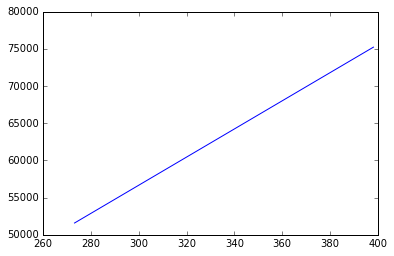

In [26]:
plt.plot(temps, pcyl_rk)  # define a basic plot, with x-values (temp) and y-values (pcyl_rk)
plt.show()  # show the plot

It will be convenient to measure the percent difference between two values,
    
$$
\%_\text{error} = \left|\frac{s - t}{s}\right| \times 100
$$
    
-   Compose a function `error` which accepts two `float`s `s` and `t` and returns the error as a percentage difference.  If you need to `import` any functions, use the `abs`olute value from `numpy`.

In [27]:
# define your function here
def error(s, t):
    """
    Return the percentage difference between two values.
    
    Keyword arguments:
    s, t -- numeric values to compare, with reference to the former.
    """
    
    ## YOU WRITE THE REST OF THIS BLOCK
    err = abs((s-t)/s)*100
    # Finally, return the percentage difference (the 'error').
    return err

In [28]:
# it should pass this test---do NOT edit this cell
from numpy import isclose
assert isclose(error(4,5), 25)
print('Success!')

Success!


At the right-most data point in the last data calculation (temperature $398.15\,\text{K}$, volume $0.044\,\text{m}^3$), what is the percent difference between the ideal-gas law and Redlich–Kwong calculations, using $P_\text{ig}$ as the standard?  (We are modeling oxygen `'O2'` right now.)

Directly:

In [142]:
Pig = pig(0.044, 398.15)
Prk = prk(0.044, 398.15, Tc=fluids['O2']['Tc'], Pc=fluids['O2']['Pc'])
print(error(Pig, Prk))

0.009684073414949094


In [143]:
print(Pig,Prk)

75232.25227272727 75224.96672618546


Using the former array:

In [144]:
fluids = gasdata()

volume  = 0.044  # m**3
temps = np.array((273.15,  298.15,  323.15,  348.15,  373.15,  398.15))

pcyl_rk = prk(volume, temps, fluids['O2']['Tc'], fluids['O2']['Pc'])
pcyl_ig = pig(volume, temps)
print(error(pcyl_ig[-1],pcyl_rk[-1]))

0.00968407341495


The behavior is straightforward, just like with a list.

The real power occurs when you want to know more than just a single point:

In [32]:
print(error(pcyl_rk, pcyl_ig))

[ 0.05522  0.04223  0.03171  0.02304  0.0158   0.00969]


NumPy permits `error` to be applied over the entire range at one go.  You can plot it as well:

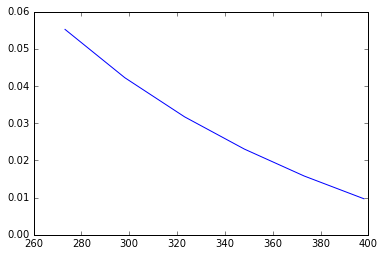

In [33]:
errors = error(pcyl_rk, pcyl_ig)
plt.plot(temps, errors)  # define a basic plot, with x-values (temp) and y-values (pcyl_rk)
plt.show()  # show the plot

Using the tools we've developed thus far, let's examine our use-case scenario of gases stored in a standard cylinder.  To refresh:

In [135]:
fluids = gasdata()

volume  = 0.044  # m**3
temps = np.array((273.15,  298.15,  323.15,  348.15,  373.15,  398.15))

pcyl_ig = pig(volume, temps)
pcyl_rk = prk(volume, temps, Tc=fluids['O2']['Tc'], Pc=fluids['O2']['Pc'])

You should also define the van der Waals pressure as `pcyl_vdw`.

In [137]:
# YOU DEFINE pcyl_vdw HERE
pcyl_vdw =pvdw(volume, temps, Tc=fluids['O2']['Tc'], Pc=fluids['O2']['Pc'])

-   Plot all three gas laws across the range of temperatures.  You need to modify the following code to do so. (The plot should have multiple curves, but you'll probably going to see just one; check why.)

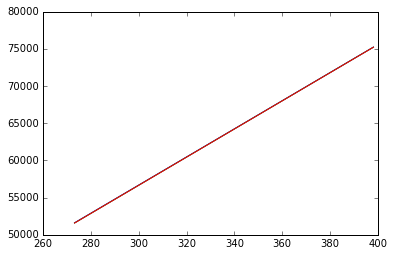

In [138]:
plt.plot(temps, pcyl_ig,
         temps, pcyl_rk,
         temps, pcyl_vdw)
plt.show()


-   Now drop the volume by 90% to `0.0044` and calculate pressures at the same temperatures as above.  (Use the same variable names for `pcyl_ig`, etc.)  Plot the resulting error curves of `pcyl_ig` versus `pcyl_rk` and `pcyl_ig` versus `pcyl_vdw` across the range of temperature, both using `pcyl_ig` as the standard.  (There will be two curves in your plot.)

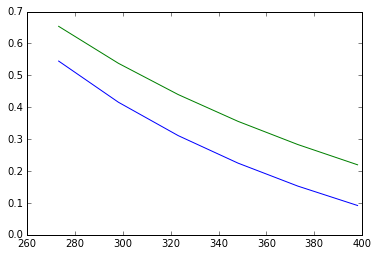

In [140]:
# YOU RECALCULATE THE VARIABLES HERE
volume  = 0.0044

pcyl_ig = pig(volume, temps)
pcyl_rk = prk(volume, temps, Tc=fluids['O2']['Tc'], Pc=fluids['O2']['Pc'])
pcyl_vdw =pvdw(volume, temps, Tc=fluids['O2']['Tc'], Pc=fluids['O2']['Pc'])
# YOU WRITE THE plt.plot STATEMENT
errs = error(pcyl_ig, pcyl_rk)
errs2 = error(pcyl_ig, pcyl_vdw)
plt.plot(temps, errs, 
         temps, errs2)
plt.show()

Argon is considered to behave very closely to an ideal gas because it is a spherical one-atom molecule.

Consider the pressure of argon in a small gas cylinder:

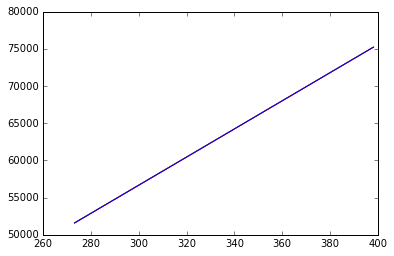

In [94]:
fluids = gasdata()

volume = 0.044 # m**3
temps = np.array((273.15,  298.15,  323.15,  348.15,  373.15,  398.15))

pcyl_ig  = pig( volume, temps)
pcyl_rk  = prk( volume, temps, Tc=fluids['Ar']['Tc'], Pc=fluids['Ar']['Pc'])
pcyl_vdw = pvdw(volume, temps, Tc=fluids['Ar']['Tc'], Pc=fluids['Ar']['Pc'])

plt.plot(temps, pcyl_ig,  'g-',
         temps, pcyl_rk,  'r-',
         temps, pcyl_vdw, 'b-')
plt.show()

-   Plot the resulting error curves of `pcyl_ig` versus `pcyl_rk` and `pcyl_ig` versus `pcyl_vdw` across the range of temperature.  (There will be two curves in your plot.)

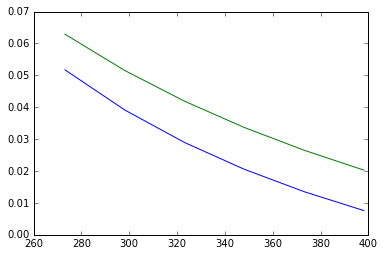

In [95]:
# YOU WRITE THE plt.plot STATEMENT AND ANY NECESSARY CODE
errs = error(pcyl_ig, pcyl_rk)
errs2 = error(pcyl_ig, pcyl_vdw)
plt.plot(temps, errs, temps, errs2)

plt.show()

Argon's behavior doesn't deviate much from ideality across this range of temperatures.

In [96]:
errs = error(pcyl_ig[-1],pcyl_rk[-1])
print(errs)

0.00759049949622


In contrast, butane ($\text{C}_4\text{H}_{10}$, `C4H10`) is shaped like a Y and tends to behave very non-ideally.  It is a gas at room temperature and standard atmospheric pressure, but even in a tiny thin-shelled plastic lighter it is a liquid.  While we won't quantify the liquid–gas transition directly (which is a pretty involved calculation), we will see how far from ideality butane is.

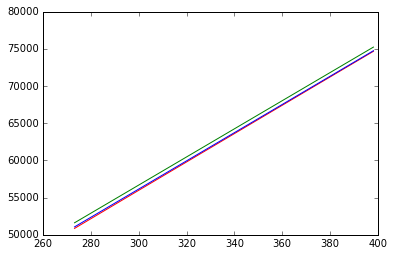

In [88]:
fluids = gasdata()

volume = 0.044 # m**3
temps = np.array((273.15,  298.15,  323.15,  348.15,  373.15,  398.15))
pcyl_ig  = pig( volume, temps)
pcyl_rk  = prk( volume, temps, Tc=fluids['C4H10']['Tc'], Pc=fluids['C4H10']['Pc'])
pcyl_vdw = pvdw(volume, temps, Tc=fluids['C4H10']['Tc'], Pc=fluids['C4H10']['Pc'])

plt.plot(temps, pcyl_ig,  'g-',
         temps, pcyl_rk,  'r-',
         temps, pcyl_vdw, 'b-')
plt.show()

-   Plot the resulting error curves of `pcyl_ig` versus `pcyl_rk` and `pcyl_ig` versus `pcyl_vdw` across the range of temperature.  (There will be two curves in your plot.)

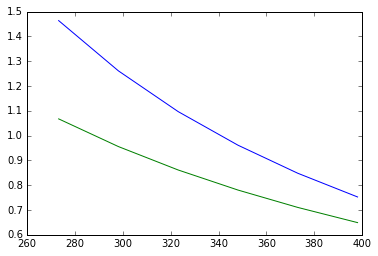

In [89]:
# YOU RECALCULATE THE VARIABLES HERE
errs = error(pcyl_ig, pcyl_rk)
errs2 = error(pcyl_ig, pcyl_vdw)
plt.plot(temps, errs, 
         temps, errs2)

# YOU WRITE THE plt.plot STATEMENT
plt.show()

Compared to argon or even oxygen, butane is pretty far away from ideality (the green line).

-   At the right-most data point (temperature $398.15\,\text{K}$), what is the percent difference between the ideal-gas law and Redlich–Kwong for butane, using $P_\text{ig}$ as the standard?  This is about 100 times worse of a match than argon to ideality.

In [92]:
# WRITE ANY NECESSARY CODE HERE
# STORE YOUR ANSWER IN THE VARIABLE `ans`
errs = error(pcyl_ig[-1],pcyl_rk[-1])
print(errs)

0.752552525397


Prior predictions were quite close to each other, within a few percent.  But for other cases they diverge dangerously (if one relies on the less-accurate equation).  Consider an amount of CO$_2$ gas compressed into the small volume of $0.000667\,\text{m}^3$ at a temperature of $248.15\,\text{K}$ ($-25\,^{\circ}\text{C}$).

-   What is the pressure according to the ideal-gas law?

In [76]:
# WRITE ANY NECESSARY CODE HERE
# STORE YOUR ANSWER IN THE VARIABLE `ans`
volume = 0.000667
temps = 248.15
ans  = pig( volume, temps)
print(ans)

3093132.083958021


-   What is the pressure according to the Redlich-Kwong gas law?

In [74]:
# WRITE ANY NECESSARY CODE HERE
# STORE YOUR ANSWER IN THE VARIABLE `ans`
volume = 0.000667
temps = 248.15
ans  = prk(volume, temps, Tc=fluids['CO2']['Tc'], Pc=fluids['CO2']['Pc'])
print(ans)

2354692.88969142


-   What is the pressure according to the van der Waals gas law?

In [75]:
# WRITE ANY NECESSARY CODE HERE
# STORE YOUR ANSWER IN THE VARIABLE `ans`
volume = 0.000667
temps = 248.15
ans  = pvdw(volume, temps, Tc=fluids['CO2']['Tc'], Pc=fluids['CO2']['Pc'])
print(ans)

2483769.9733843813


Clearly, at low temperatures and high pressures the laws start to break down, due to deviations from ideality and condensation.

Let's go even more extreme:  take a volume of 10% of that, or `0.0000667`.  (At this absurdly small volume, one can expect very high pressures to be necessary to contain the fluid, and our results become unphysical at some point---but that point is not determinable from the equations themselves!)

-   Plot the pressures of all three equations of state for CO$_{2}$ at across the temperature range $\{100, 125, 150, 175, 200\} \,^{\circ}\text{C}$ for $V = 0.0000667 \,\text{m}^3$.  (Note that you will need to convert from degrees centigrade to Kelvin, $T[K] = T[^{\circ}\text{C}] + 273.15$.)

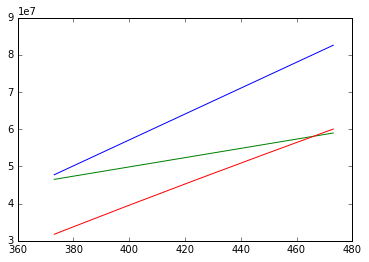

In [124]:
# YOU RECALCULATE THE VARIABLES HERE
volume = 0.0000667
temps = np.array((100,125,150,175,200))+273.15

pcyl_ig  = pig( volume, temps)
pcyl_rk  = prk( volume, temps, Tc=fluids['CO2']['Tc'], Pc=fluids['CO2']['Pc'])
pcyl_vdw = pvdw(volume, temps, Tc=fluids['CO2']['Tc'], Pc=fluids['CO2']['Pc'])

# YOU WRITE THE plt.plot STATEMENT
plt.plot(temps, pcyl_ig,  'g-',
         temps, pcyl_rk,  'r-',
         temps, pcyl_vdw, 'b-')
plt.show()

-   At $T = 500\,\text{K}$, $V = 0.0000667 \,\text{m}^3$ for CO$_{2}$, what is the percent difference between the ideal-gas law and Redlich–Kwong, using $P_\text{ig}$ as the standard?

In [131]:
# WRITE ANY NECESSARY CODE HERE
# STORE YOUR ANSWER IN THE VARIABLE `ans`
temps = 500
volume = 0.0000667
pcyl_ig  = pig( volume, temps)
pcyl_rk  = prk( volume, temps, Tc=fluids['CO2']['Tc'], Pc=fluids['CO2']['Pc'])
err = error(pcyl_ig,pcyl_rk)
print(err)

8.028639869536356


-   Under the same conditions for CO$_{2}$, what is the percent difference between the ideal-gas law and the van der Waals law, using $P_\text{ig}$ as the standard?

In [132]:
# WRITE ANY NECESSARY CODE HERE
# STORE YOUR ANSWER IN THE VARIABLE `ans`
pcyl_vdw = pvdw(volume, temps, Tc=fluids['CO2']['Tc'], Pc=fluids['CO2']['Pc'])
err = error(pcyl_ig,pcyl_vdw)
print(err)

47.492227581906995


-   Plot the pressures of all three equations of state for CO$_{2}$ across the temperature range $\{100, 110, 120, ..., 390, 400\} \,\text{K}$ for $V = 0.0000667 \,\text{m}^3$.  Use `np.linspace` to construct the range.
-   And then plot error curves of pcyl_ig versus pcyl_rk, and pcyl_ig versus pcyl_vdw across the range of temperature. (There will be two plots.)

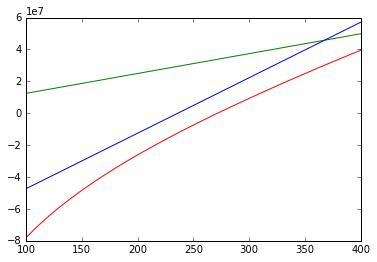

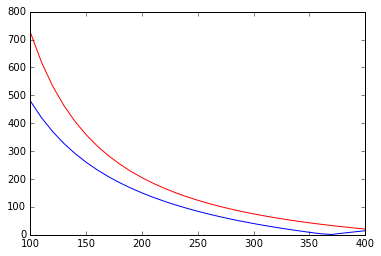

[ 100.  110.  120.  130.  140.  150.  160.  170.  180.  190.  200.  210.
  220.  230.  240.  250.  260.  270.  280.  290.  300.  310.  320.  330.
  340.  350.  360.  370.  380.  390.  400.]


In [156]:
# range to use (for x-values)
temps = np.linspace(100,400,31)  # `linspace` conveniently breaks a range in N pieces---in this case, 31 divisions from 100 to 400
volume = 0.0000667

# YOU RECALCULATE THE VARIABLES HERE
pcyl_ig  = pig(volume, temps)
pcyl_rk  = prk(volume, temps, Tc=fluids['CO2']['Tc'], Pc=fluids['CO2']['Pc'])
pcyl_vdw = pvdw(volume, temps, Tc=fluids['CO2']['Tc'], Pc=fluids['CO2']['Pc'])

# YOU WRITE THE plt.plot STATEMENT
plt.plot(temps, pcyl_ig,  'g-',
         temps, pcyl_rk,  'r-',
         temps, pcyl_vdw, 'b-')
plt.show()

err = error(pcyl_ig, pcyl_rk)
err2 = error(pcyl_ig, pcyl_vdw)
plt.plot(temps, err, 'r-',
         temps, err2, 'b-')
plt.show()

print(temps)

Equations of state find broad application, but it's clear that you as an engineer need to understand the differences between them, the ranges of applicability, and the risks of under- or overestimating the pressure–temperature relationship in order to carry out sound engineering.

Last try: now plot error curves of pcyl_rk versus pcyl_ig (pcyl_rk as the standard), and pcyl_vdw versus pcyl_ig (pcyl_vdw as the standard) across the range of temperature. Compare this result to the curves in the previous plot. And think:
-   Why do they look so different?
-   How to explain the two spikes in the new plot?

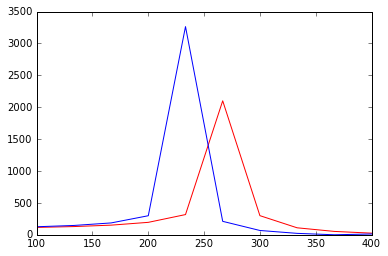

In [154]:
err = error(pcyl_rk,pcyl_ig)
err2 = error(pcyl_vdw, pcyl_ig)
plt.plot(temps, err, 'r-',
         temps, err2, 'b-')
plt.show()